---
# Bootstrapping

El bootstrapping es una técnica estadística de remuestreo que consiste en generar muchas muestras aleatorias (con reemplazo) a partir de los datos originales para estimar la variabilidad de un estadístico (como la media, mediana, proporción, etc.).
Se usa para calcular intervalos de confianza o errores estándar cuando no se conoce la distribución teórica del estimador.

---

Supongamos que estamos controlando la calidad de un producto que es fabricado en una empresa. Para esto, se realiza un control de calidad seleccionado aleatoriamente 50 producto, los cuales son inspeccionados uno a uno en busca de fallos.

Los resultados son registrados con un 0 cuando no hay falla, y con un 1 cuando sí la hay. Es así que se obtiene el siguiente registro:


In [26]:
import numpy as np

In [16]:
# registro original de valores
registro = '00001001001000011000000000100011000000010000001000'


In [28]:
# transformamos a nd.array de zeros y unos (valores int)
x = np.array([int(i) for i in list(registro)])

In [29]:
x[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [93]:
# numero de sampleos
N = 100000

x_samples_10 = np.random.choice(x, size=(N, x.size), replace=True)
x_samples_means_10 = np.mean(x_samples_10, axis=1)

In [ ]:
ic = np.percentile(x_samples_means_10, [2.5, 97.5]) # intervalo de confianza del 95% donde se excluyen los percentiles 2.5 y 97.5
ic

array([0.1 , 0.32])

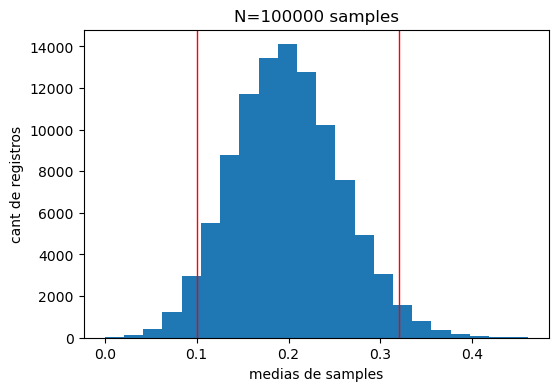

In [99]:
plt.figure(figsize=(6,4))
plt.title('N=' + str(N) + ' samples')
plt.xlabel('medias de samples')
plt.ylabel('cant de registros')
plt.hist(x_samples_means_10, bins=22)
plt.axvline(x=ic[0], c='r', lw=1)
plt.axvline(x=ic[1], c='r', lw=1)
plt.show()